In [4]:
%matplotlib notebook
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [5]:
data = pd.read_csv('C:\\Users\\Tusharika Joshi\\Downloads\\bmi.csv')

In [6]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [7]:
data.shape

(500, 4)

<IPython.core.display.Javascript object>


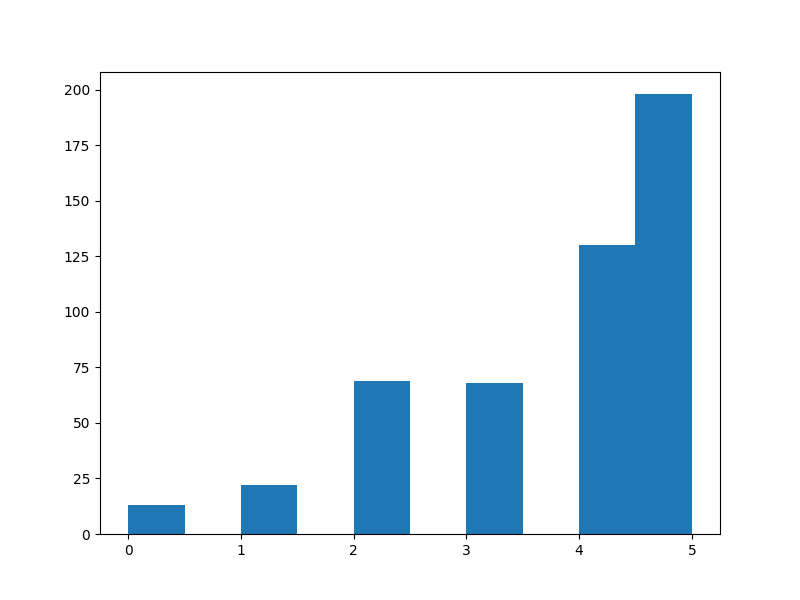

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(data['Index'])
plt.show()

<IPython.core.display.Javascript object>


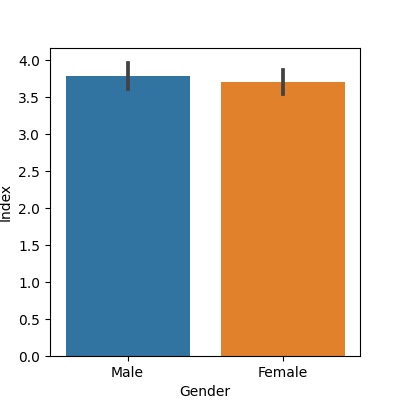

In [9]:
plt.figure(figsize=(4, 4))
sn.barplot(x=data["Gender"], y=data["Index"])
plt.show()

<IPython.core.display.Javascript object>


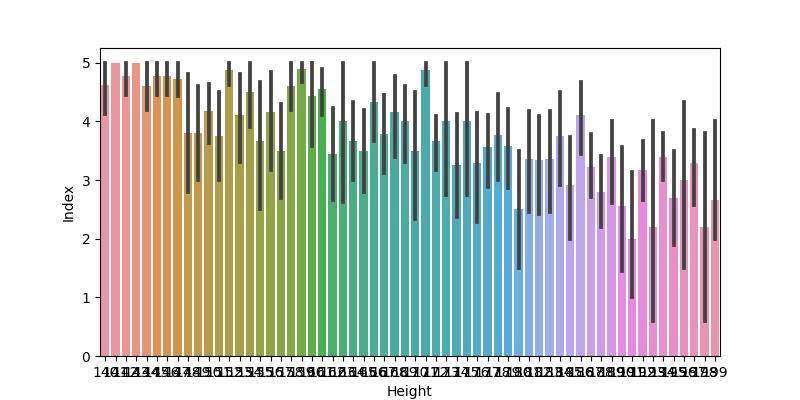

In [10]:
plt.figure(figsize=(8, 4))
sn.barplot(x=data["Height"], y=data["Index"])
plt.show()

<IPython.core.display.Javascript object>


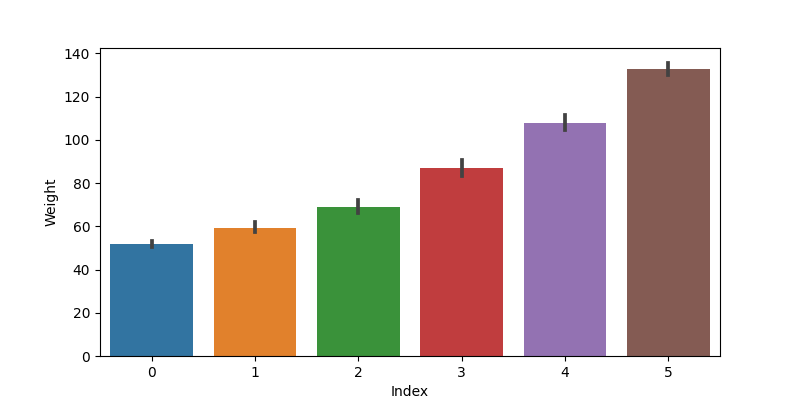

In [11]:
plt.figure(figsize=(8, 4))
sn.barplot(y=data["Weight"], x=data["Index"])
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
data["gender"] = le.fit_transform(data["Gender"])

In [14]:
data.describe()

,Height,Weight,Index,gender
count,500.000000,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000,0.490000
std,16.375261,32.382607,1.355053,0.500401
min,140.000000,50.000000,0.000000,0.000000
25%,156.000000,80.000000,3.000000,0.000000
50%,170.500000,106.000000,4.000000,0.000000
75%,184.000000,136.000000,5.000000,1.000000
max,199.000000,160.000000,5.000000,1.000000


In [15]:
data.head()

,Gender,Height,Weight,Index,gender
0,Male,174,96,4,1
1,Male,189,87,2,1
2,Female,185,110,4,0
3,Female,195,104,3,0
4,Male,149,61,3,1


In [16]:
data["Height"] = data["Height"]/100
data["Weight"] = data["Weight"]/100

In [17]:
X=data.drop(["Index", "Gender"], axis="columns")
Y=data["Index"]

In [18]:
from sklearn.model_selection import train_test_split



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
error_rate =[]

for i in range (1,50):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

<IPython.core.display.Javascript object>


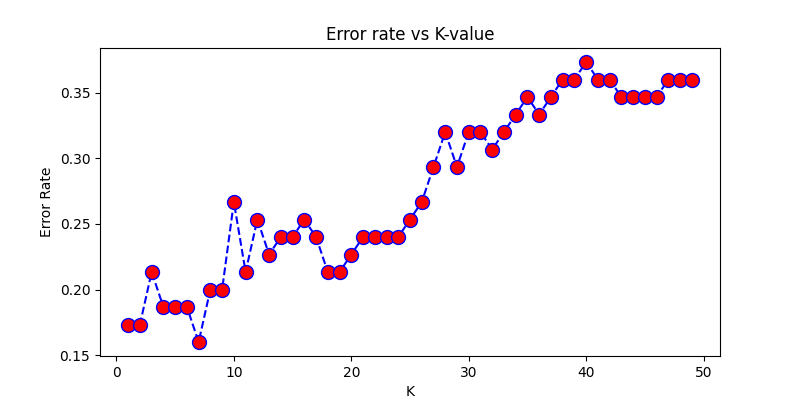

Text(0, 0.5, 'Error Rate')

In [21]:
plt.figure(figsize=(8,4))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [22]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
pred_knn=knn.predict(X_test)
sklearn.metrics.confusion_matrix(y_test,pred_knn)

array([[ 3,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  0,  7,  2,  0,  0],
       [ 0,  0,  1, 10,  4,  0],
       [ 0,  0,  1,  1, 11,  2],
       [ 0,  0,  0,  1,  3, 27]], dtype=int64)

In [24]:
print(sklearn.metrics.classification_report(y_test,pred_knn, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.50      1.00      0.67         1
           2       0.78      0.78      0.78         9
           3       0.71      0.67      0.69        15
           4       0.61      0.73      0.67        15
           5       0.93      0.87      0.90        31

    accuracy                           0.79        75
   macro avg       0.76      0.80      0.76        75
weighted avg       0.80      0.79      0.79        75



In [25]:
print("Train Accuracy: %0.2f" % knn.score(X_train, y_train))
print("Test Accuracy: %0.2f" % knn.score(X_test, y_test))

Train Accuracy: 0.95
Test Accuracy: 0.79


In [46]:
from sklearn.svm import SVC

In [47]:
sv= SVC(kernel='rbf', random_state = 1)
sv.fit(X_train,y_train)

SVC(random_state=1)

In [48]:
pred_sv=sv.predict(X_test)
sklearn.metrics.confusion_matrix(y_test, pred_sv)

array([[ 0,  0,  4,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  8,  1,  0,  0],
       [ 0,  0,  3,  4,  8,  0],
       [ 0,  0,  0,  0, 14,  1],
       [ 0,  0,  0,  0,  4, 27]], dtype=int64)

In [49]:
print(sklearn.metrics.classification_report(y_test,pred_sv, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.50      0.89      0.64         9
           3       0.80      0.27      0.40        15
           4       0.54      0.93      0.68        15
           5       0.96      0.87      0.92        31

    accuracy                           0.71        75
   macro avg       0.47      0.49      0.44        75
weighted avg       0.73      0.71      0.67        75



In [50]:
print("Train Accuracy: %0.2f" % sv.score(X_train, y_train))
print("Test Accuracy: %0.2f" % sv.score(X_test, y_test))

Train Accuracy: 0.81
Test Accuracy: 0.71


In [26]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [27]:
hyperparameter_space = {'max_depth':[2,3,4,5,6,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[2,3,4,5,6,8,10,11]}

In [28]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(tree, param_grid=hyperparameter_space, 
                  scoring="accuracy",
                  n_jobs=-1, cv=10, return_train_score=True)

In [52]:
gs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", gs.best_params_)

C:\Users\Tusharika Joshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Optimal hyperparameter combination: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 6}


In [53]:
gs.best_estimator_.fit(X_train, y_train)
pred_tree = gs.best_estimator_.predict(X_test) # Predictions
#y_true = y_test # True values
sklearn.metrics.confusion_matrix(y_test, pred_tree)

array([[ 4,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  0,  8,  1,  0,  0],
       [ 0,  0,  1, 10,  4,  0],
       [ 0,  0,  0,  1, 13,  1],
       [ 0,  0,  0,  0,  4, 27]], dtype=int64)

In [54]:
print(sklearn.metrics.classification_report(y_test,pred_tree, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1
           2       0.89      0.89      0.89         9
           3       0.83      0.67      0.74        15
           4       0.62      0.87      0.72        15
           5       0.96      0.87      0.92        31

    accuracy                           0.84        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.86      0.84      0.84        75



In [55]:
from sklearn.metrics import accuracy_score
print("Train Accuracy:", gs.best_score_)
print("Test accuracy:", np.round(accuracy_score(y_test, pred_tree), 2))

Train Accuracy: 0.8447397563676633
Test accuracy: 0.84


In [35]:
from sklearn.svm import SVC

In [36]:
sv= SVC(kernel='rbf', random_state = 1)
sv.fit(X_train,y_train)

SVC(random_state=1)

In [37]:
pred_sv=sv.predict(X_test)
sklearn.metrics.confusion_matrix(y_test, pred_sv)

array([[ 0,  0,  4,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  8,  1,  0,  0],
       [ 0,  0,  3,  4,  8,  0],
       [ 0,  0,  0,  0, 14,  1],
       [ 0,  0,  0,  0,  4, 27]], dtype=int64)

In [44]:
print(sklearn.metrics.classification_report(y_test,pred_sv, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.50      0.89      0.64         9
           3       0.80      0.27      0.40        15
           4       0.54      0.93      0.68        15
           5       0.96      0.87      0.92        31

    accuracy                           0.71        75
   macro avg       0.47      0.49      0.44        75
weighted avg       0.73      0.71      0.67        75



In [45]:
print("Train Accuracy: %0.2f" % sv.score(X_train, y_train))
print("Test Accuracy: %0.2f" % sv.score(X_test, y_test))

Train Accuracy: 0.81
Test Accuracy: 0.71
